In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
## Check if the results obtained from the clustering are meaningful ##

#grid 3834 - red cluster area
#grid 5318 - blue cluster area
#grid 4468 - green cluster area
#grid 5760 - orangeish cluster area
#grid 5162 - purple cluster area

hours_of_interest = [96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120]
normalized = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]

dfs = pd.DataFrame({})

for i in range(1,10):
    df = pd.read_csv('./csv/sms-call-internet-mi-2013-11-0{}.csv'.format(i), parse_dates=['time'])
    dfs = dfs.append(df)
df = pd.read_csv('./csv/sms-call-internet-mi-2013-11-10.csv', parse_dates=['time'])
dfs = dfs.append(df)
dfs = dfs.fillna(0)
del (df)

In [3]:
#Group by hours and aggregate values according to the hour
dfgr = dfs[['cellid', 'time', 'smsin','smsout', 'callin','callout', 'internet']].groupby(['time', 'cellid'], as_index=False).sum()
dfgr['hour'] = dfgr.time.dt.hour+dfgr.time.dt.minute/60+24*(dfgr.time.dt.day-1)
dfgr = dfgr.set_index(['hour']).sort_index()
del (dfs)

In [4]:
dfgr.head()

,time,cellid,smsin,smsout,callin,callout,internet
hour,,,,,,,
0.0,2013-11-01,1,0.223227,0.156787,0.160938,0.052275,11.028366
0.0,2013-11-01,2,0.222201,0.147617,0.164946,0.054712,11.058225
0.0,2013-11-01,3,0.221109,0.137855,0.169213,0.057306,11.090008
0.0,2013-11-01,4,0.226198,0.183349,0.149327,0.045216,10.941881
0.0,2013-11-01,5,0.205065,0.175393,0.139139,0.043455,9.916548


In [5]:
#dfgr.describe()
#########################################################
#From 01-11 to 10-11 (01,02,03 are weekend/festive days)#
#########################################################

In [6]:
print("CELL 3834 - Red cluster")

CELL 3834 - Red cluster


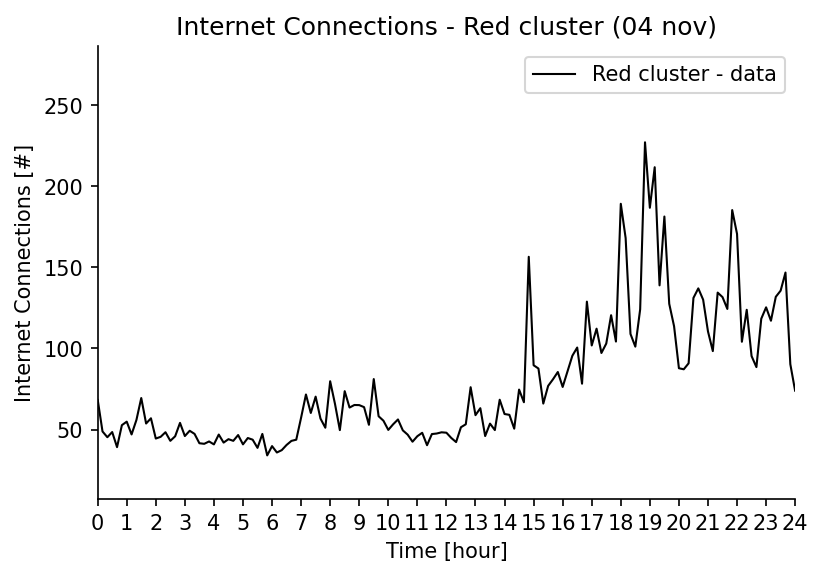

In [7]:
#Office area - industrial zone
ydatai1 = dfgr[dfgr.cellid==3834]['internet']
xdatai1 = dfgr[dfgr.cellid==3834]['internet'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatai1, ydatai1, color='black', linewidth=1, linestyle='-', label='Red cluster - data')
plt.title("Internet Connections - Red cluster (1-10 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Internet Connections [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
plt.savefig('./wday-time-clustering/int-work-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatai1, ydatai1, color='black', linewidth=1, linestyle='-', label='Red cluster - data')
plt.title("Internet Connections - Red cluster (04 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Internet Connections [#]")
plt.xlim([96,96+24]) #working day - weekday
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine() #removes right and top spines from the plot
plt.savefig('./wday-time-clustering/int-work.png')
plt.show()

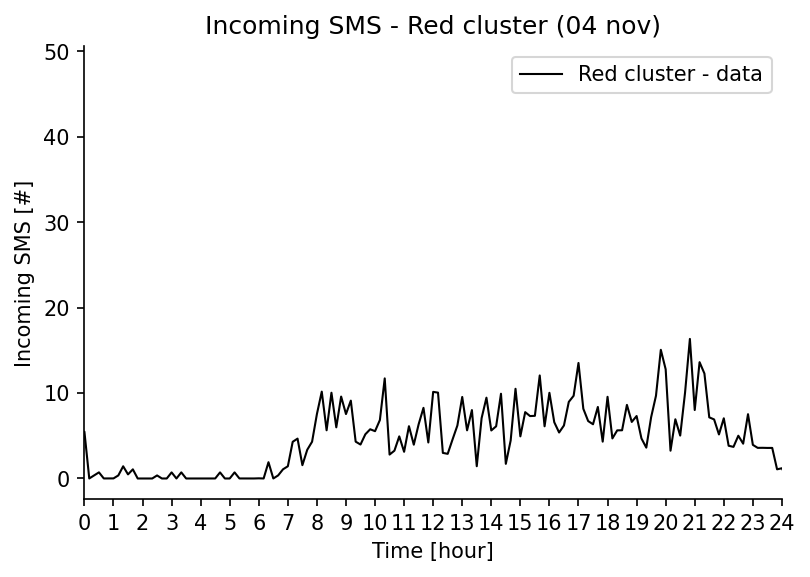

In [8]:

ydatasi1 = dfgr[dfgr.cellid==3834]['smsin']
xdatasi1 = dfgr[dfgr.cellid==3834]['smsin'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatasi1, ydatasi1, color='black', linewidth=1, linestyle='-', label='Red cluster - data')
plt.title("Incoming SMS - Red cluster (1-10 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming SMS [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
plt.savefig('./wday-time-clustering/smsin-red-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatasi1, ydatasi1, color='black', linewidth=1, linestyle='-', label='Red cluster - data')
plt.title("Incoming SMS - Red cluster (04 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming SMS [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.savefig('./wday-time-clustering/smsin-red.png')
plt.show()

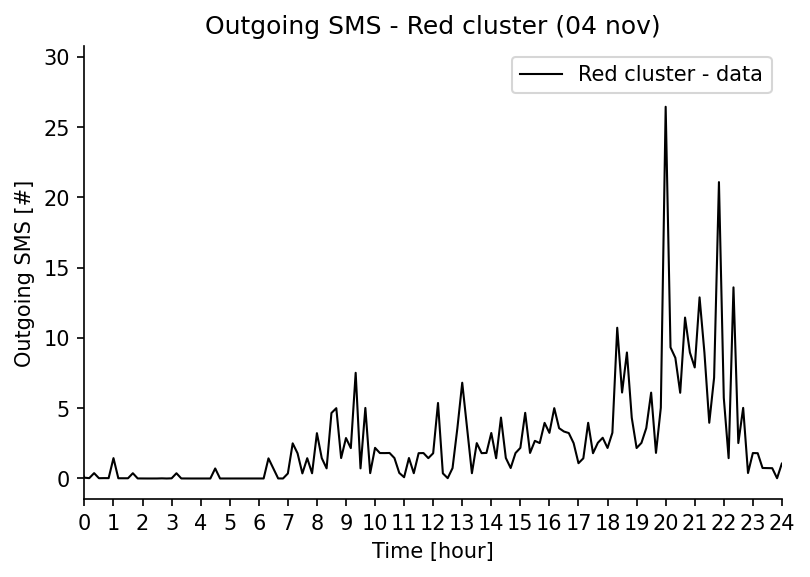

In [9]:

ydataso1 = dfgr[dfgr.cellid==3834]['smsout']
xdataso1 = dfgr[dfgr.cellid==3834]['smsout'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataso1, ydataso1, color='black', linewidth=1, linestyle='-', label='Red cluster - data')
plt.title("Outgoing SMS - Red cluster (1-10 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing SMS [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
plt.savefig('./wday-time-clustering/smsout-red-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataso1, ydataso1, color='black', linewidth=1, linestyle='-', label='Red cluster - data')
plt.title("Outgoing SMS - Red cluster (04 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing SMS [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.savefig('./wday-time-clustering/smsout-red.png')
plt.show()

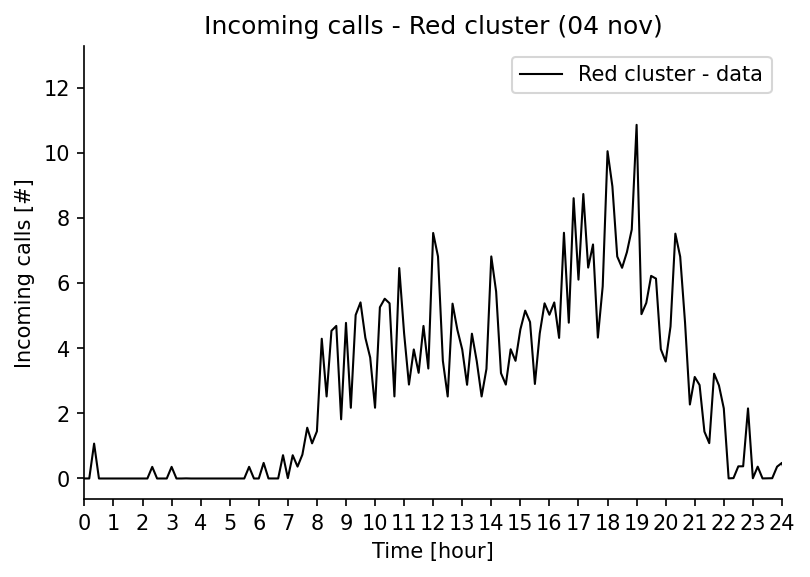

In [10]:

ydataci1 = dfgr[dfgr.cellid==3834]['callin']
xdataci1 = dfgr[dfgr.cellid==3834]['callin'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataci1, ydataci1, color='black', linewidth=1, linestyle='-', label='Red cluster - data')
plt.title("Incoming calls - Red cluster (1-10 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming calls [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
plt.savefig('./wday-time-clustering/callin-red-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataci1, ydataci1, color='black', linewidth=1, linestyle='-', label='Red cluster - data')
plt.title("Incoming calls - Red cluster (04 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming calls [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.xlim([0,168])
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.savefig('./wday-time-clustering/callin-red.png')
plt.show()

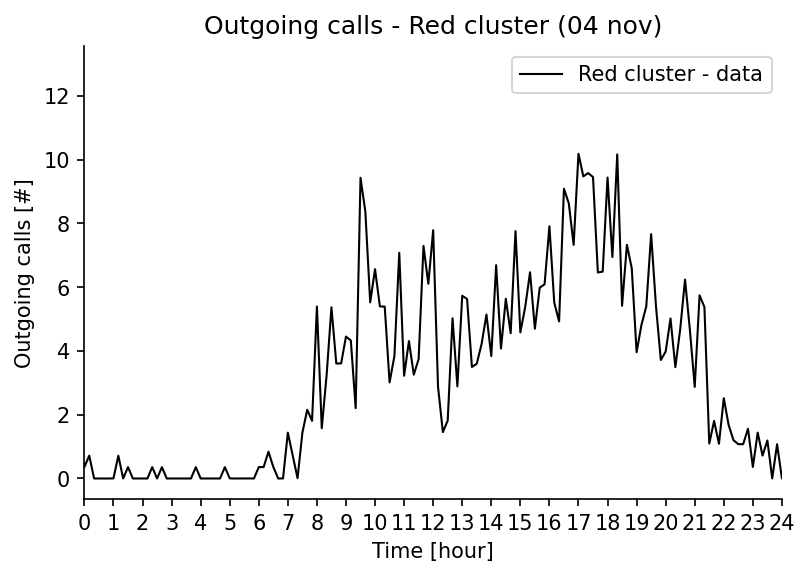

In [11]:

ydataco1 = dfgr[dfgr.cellid==3834]['callout']
xdataco1 = dfgr[dfgr.cellid==3834]['callout'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataco1, ydataco1, color='black', linewidth=1, linestyle='-', label='Red cluster - data')
plt.title("Outgoing calls - Red cluster (1-10 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing calls [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
plt.savefig('./wday-time-clustering/callout-red-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataco1, ydataco1, color='black', linewidth=1, linestyle='-', label='Red cluster - data')
plt.title("Outgoing calls - Red cluster (04 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing calls [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.savefig('./wday-time-clustering/callout-red.png')
plt.show()

In [12]:
print("CELL 5318 - blue cluster")

CELL 5318 - blue cluster


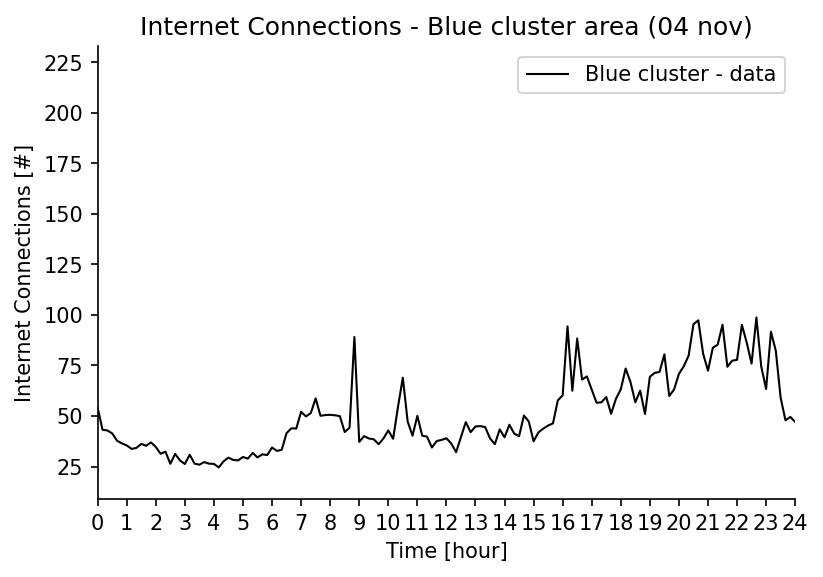

In [13]:
#Transport area (highway) data
ydatai2 = dfgr[dfgr.cellid==5318]['internet']
xdatai2 = dfgr[dfgr.cellid==5318]['internet'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatai2, ydatai2, color='black', linewidth=1, linestyle='-', label='Blue cluster - data')
plt.title("Internet Connections - Blue cluster area (1-10 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Internet Connections [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
plt.savefig('./wday-time-clustering/int-blue-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatai2, ydatai2, color='black', linewidth=1, linestyle='-', label='Blue cluster - data')
plt.title("Internet Connections - Blue cluster area (04 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Internet Connections [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.savefig('./wday-time-clustering/int-blue.png')
plt.show()

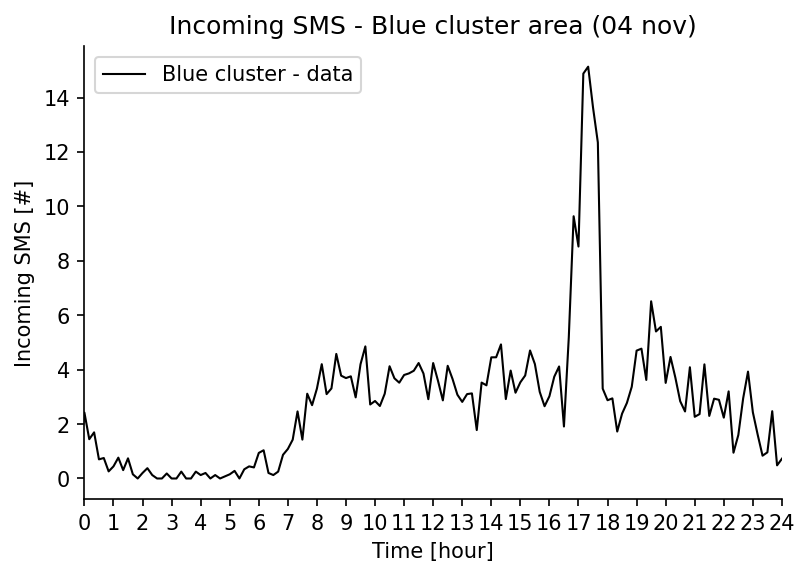

In [14]:

ydatasi2 = dfgr[dfgr.cellid==5318]['smsin']
xdatasi2 = dfgr[dfgr.cellid==5318]['smsin'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatasi2, ydatasi2, color='black', linewidth=1, linestyle='-', label='Blue cluster - data')
plt.title("Incoming SMS - Blue cluster area (1-10 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming SMS [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
plt.savefig('./wday-time-clustering/smsin-blue-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatasi2, ydatasi2, color='black', linewidth=1, linestyle='-', label='Blue cluster - data')
plt.title("Incoming SMS - Blue cluster area (04 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming SMS [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.savefig('./wday-time-clustering/smsin-blue.png')
plt.show()

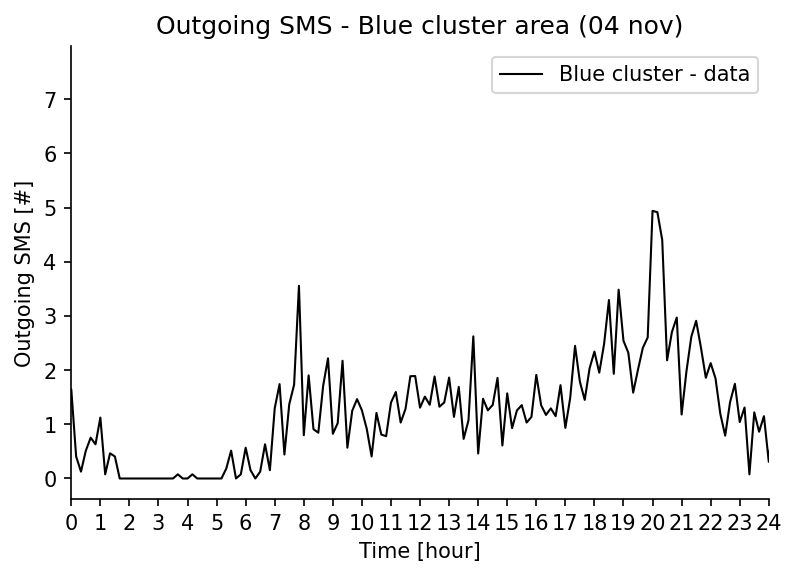

In [15]:

ydataso2 = dfgr[dfgr.cellid==5318]['smsout']
xdataso2 = dfgr[dfgr.cellid==5318]['smsout'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataso2, ydataso2, color='black', linewidth=1, linestyle='-', label='Blue cluster - data')
plt.title("Outgoing SMS - Blue cluster area (1-10 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing SMS [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
plt.savefig('./wday-time-clustering/smsout-blue-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataso2, ydataso2, color='black', linewidth=1, linestyle='-', label='Blue cluster - data')
plt.title("Outgoing SMS - Blue cluster area (04 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing SMS [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.savefig('./wday-time-clustering/smsout-blue.png')
plt.show()

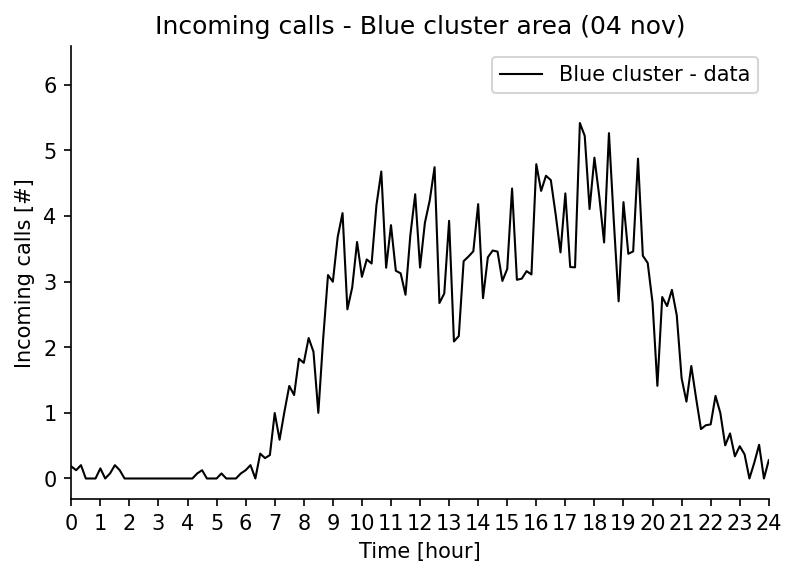

In [16]:

ydataci2 = dfgr[dfgr.cellid==5318]['callin']
xdataci2 = dfgr[dfgr.cellid==5318]['callin'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataci2, ydataci2, color='black', linewidth=1, linestyle='-', label='Blue cluster - data')
plt.title("Incoming calls - Blue cluster area (1-10 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming calls [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
plt.savefig('./wday-time-clustering/callin-blue-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataci2, ydataci2, color='black', linewidth=1, linestyle='-', label='Blue cluster - data')
plt.title("Incoming calls - Blue cluster area (04 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming calls [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.savefig('./wday-time-clustering/callin-blue.png')
plt.show()

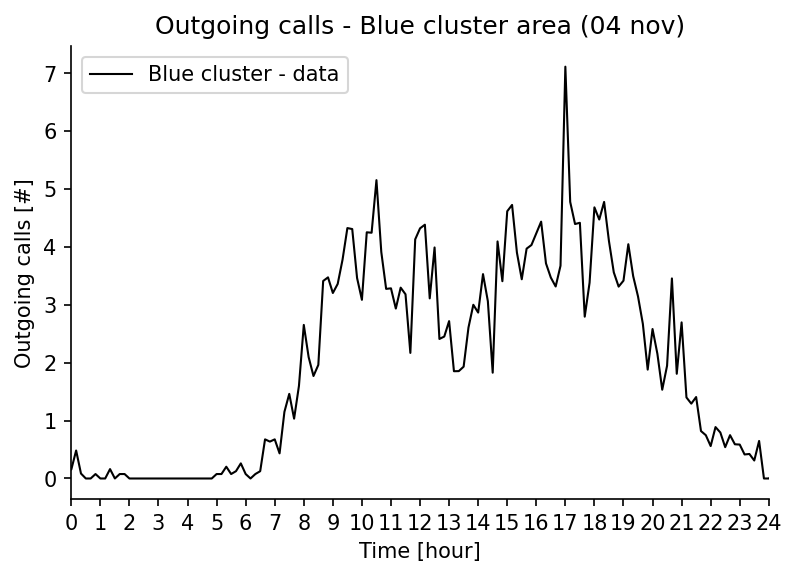

In [17]:

ydataco2 = dfgr[dfgr.cellid==5318]['callout']
xdataco2 = dfgr[dfgr.cellid==5318]['callout'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataco2, ydataco2, color='black', linewidth=1, linestyle='-', label='Blue cluster - data')
plt.title("Outgoing calls - Blue cluster area (1-10 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing calls [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
plt.savefig('./wday-time-clustering/callout-blue-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataco2, ydataco2, color='black', linewidth=1, linestyle='-', label='Blue cluster - data')
plt.title("Outgoing calls - Blue cluster area (04 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing calls [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.savefig('./wday-time-clustering/callout-blue.png')
plt.show()

In [18]:
print("CELL 5760 - orange cluster")

CELL 5760 - orange cluster


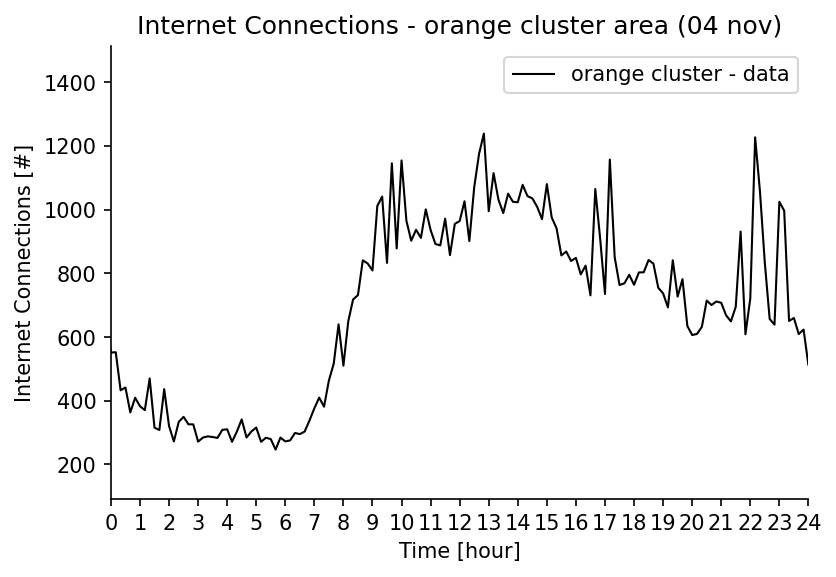

In [19]:
#Home area (near Via Luzzati) data
ydatai4 = dfgr[dfgr.cellid==5760]['internet']
xdatai4 = dfgr[dfgr.cellid==5760]['internet'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatai4, ydatai4, color='black', linewidth=1, linestyle='-', label='orange cluster - data')
plt.title("Internet Connections - orange cluster area (1-10 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Internet Connections [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
plt.savefig('./wday-time-clustering/int-orange-full.png')
plt.close('all')
##########################################################
f = plt.figure(dpi=150)
plt.plot(xdatai4, ydatai4, color='black', linewidth=1, linestyle='-', label='orange cluster - data')
plt.title("Internet Connections - orange cluster area (04 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Internet Connections [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.savefig('./wday-time-clustering/int-orange.png')
plt.show()

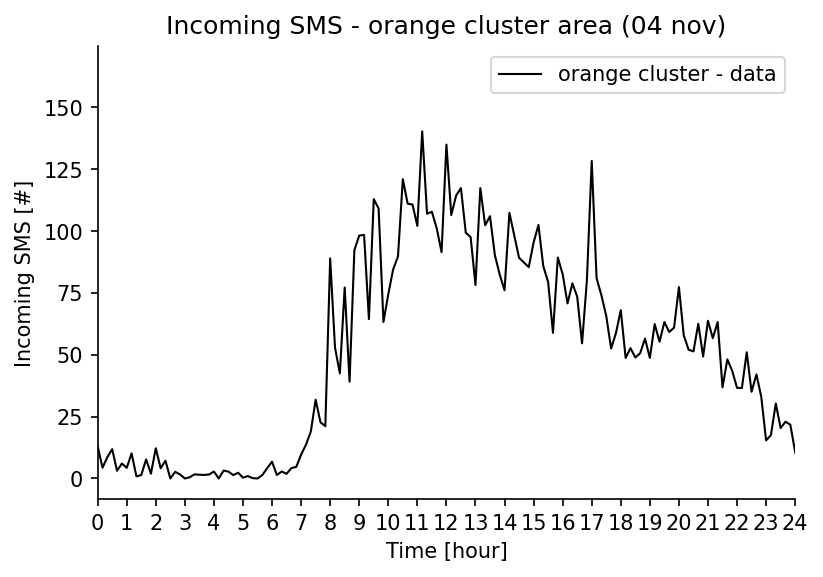

In [20]:

ydatasi4 = dfgr[dfgr.cellid==5760]['smsin']
xdatasi4 = dfgr[dfgr.cellid==5760]['smsin'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatasi4, ydatasi4, color='black', linewidth=1, linestyle='-', label='orange cluster - data')
plt.title("Incoming SMS - orange cluster area (1-10 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming SMS [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
plt.savefig('./wday-time-clustering/smsin-orange-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatasi4, ydatasi4, color='black', linewidth=1, linestyle='-', label='orange cluster - data')
plt.title("Incoming SMS - orange cluster area (04 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming SMS [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.savefig('./wday-time-clustering/smsin-orange.png')
plt.show()

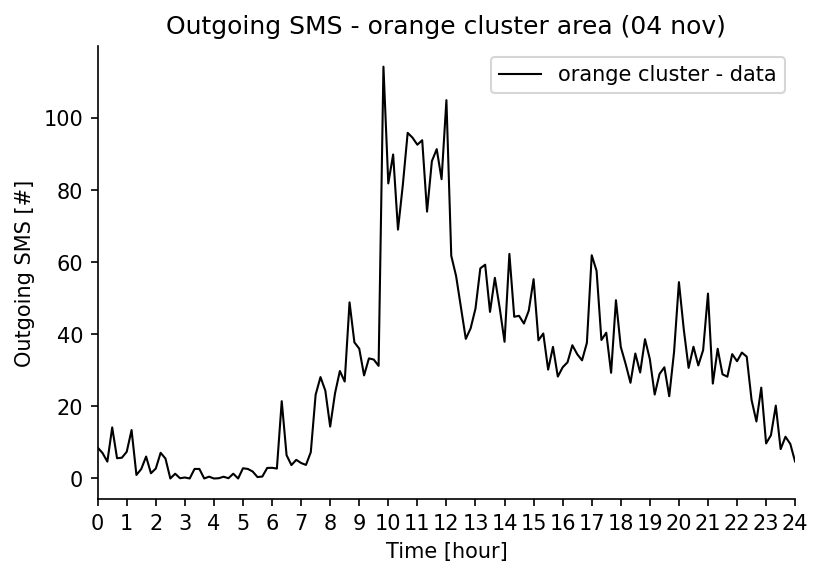

In [21]:

ydataso4 = dfgr[dfgr.cellid==5760]['smsout']
xdataso4 = dfgr[dfgr.cellid==5760]['smsout'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataso4, ydataso4, color='black', linewidth=1, linestyle='-', label='orange cluster - data')
plt.title("Outgoing SMS - orange cluster area (1-10 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing SMS [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
plt.savefig('./wday-time-clustering/smsout-orange-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataso4, ydataso4, color='black', linewidth=1, linestyle='-', label='orange cluster - data')
plt.title("Outgoing SMS - orange cluster area (04 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing SMS [#]")
plt.xlim([96,96+24])
#plt.ylim([0, 20])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.savefig('./wday-time-clustering/smsout-orange.png')
plt.show()

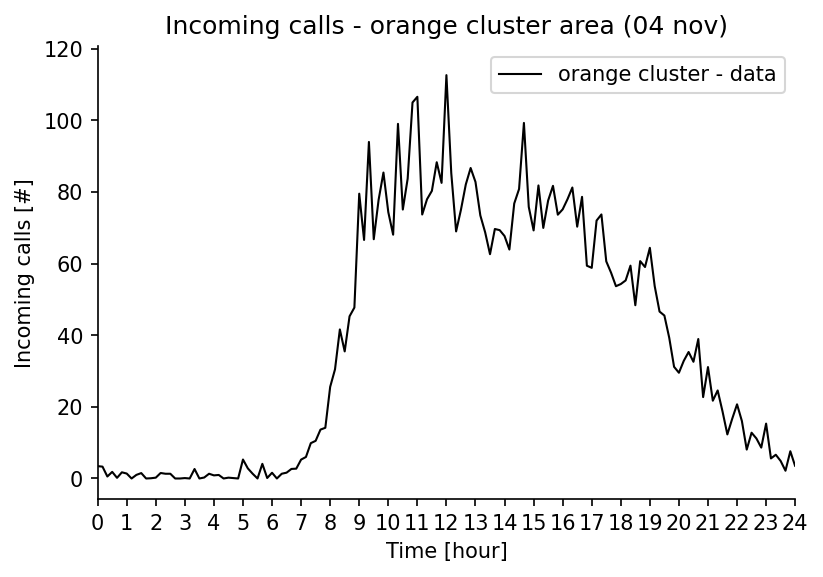

In [22]:

ydataci4 = dfgr[dfgr.cellid==5760]['callin']
xdataci4 = dfgr[dfgr.cellid==5760]['callin'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataci4, ydataci4, color='black', linewidth=1, linestyle='-', label='orange cluster - data')
plt.title("Incoming calls - orange cluster area (1-10 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming calls [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
plt.savefig('./wday-time-clustering/callin-orange-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataci4, ydataci4, color='black', linewidth=1, linestyle='-', label='orange cluster - data')
plt.title("Incoming calls - orange cluster area (04 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming calls [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.savefig('./wday-time-clustering/callin-orange.png')
plt.show()

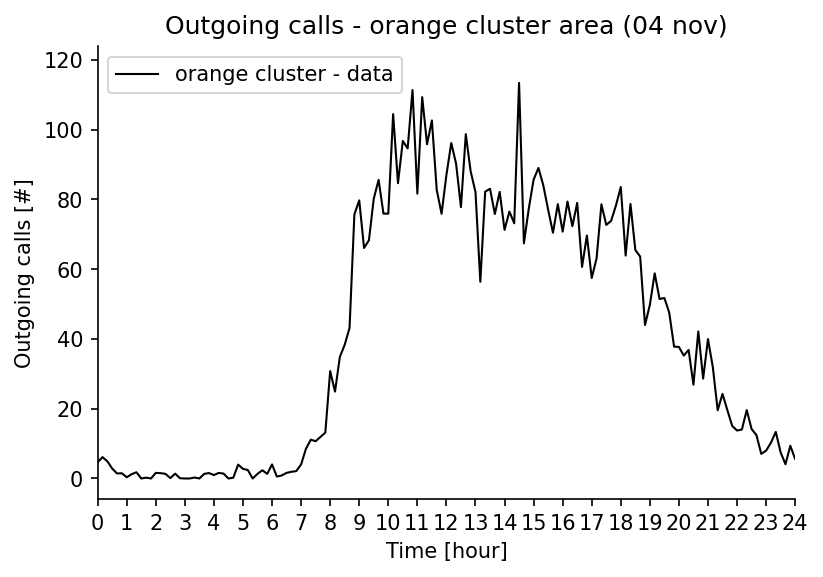

In [23]:

ydataco4 = dfgr[dfgr.cellid==5760]['callout']
xdataco4 = dfgr[dfgr.cellid==5760]['callout'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataco4, ydataco4, color='black', linewidth=1, linestyle='-', label='orange cluster - data')
plt.title("Outgoing calls - orange cluster area (1-10 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing calls [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
plt.savefig('./wday-time-clustering/callout-orange-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataco4, ydataco4, color='black', linewidth=1, linestyle='-', label='orange cluster - data')
plt.title("Outgoing calls - orange cluster area (04 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing calls [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.savefig('./wday-time-clustering/callout-orange.png')
plt.show()

In [24]:
print("CELL 5162 - purple cluster")

CELL 5162 - purple cluster


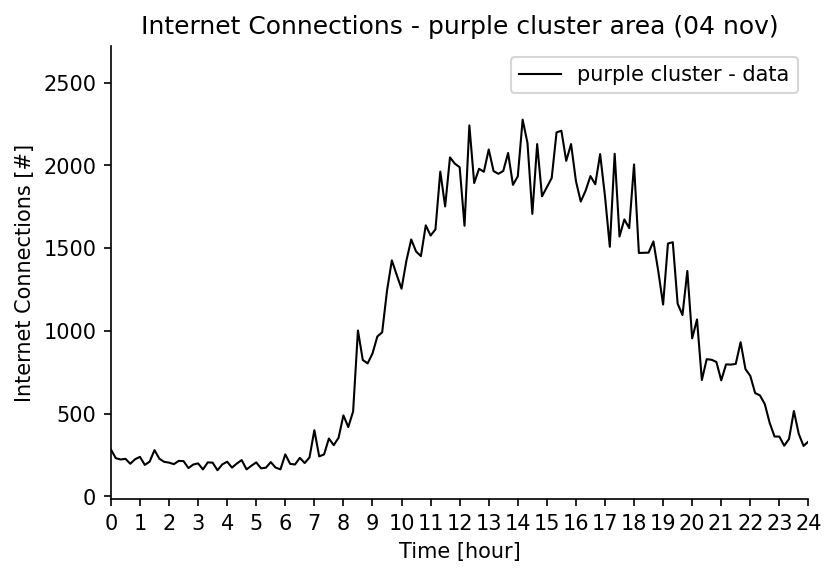

In [25]:
#Home area (near Via Luzzati) data
ydatai5 = dfgr[dfgr.cellid==5162]['internet']
xdatai5 = dfgr[dfgr.cellid==5162]['internet'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatai5, ydatai5, color='black', linewidth=1, linestyle='-', label='purple cluster - data')
plt.title("Internet Connections - purple cluster area (1-10 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Internet Connections [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
plt.savefig('./wday-time-clustering/int-purple-full.png')
plt.close('all')
##########################################################
f = plt.figure(dpi=150)
plt.plot(xdatai5, ydatai5, color='black', linewidth=1, linestyle='-', label='purple cluster - data')
plt.title("Internet Connections - purple cluster area (04 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Internet Connections [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.savefig('./wday-time-clustering/int-purple.png')
plt.show()

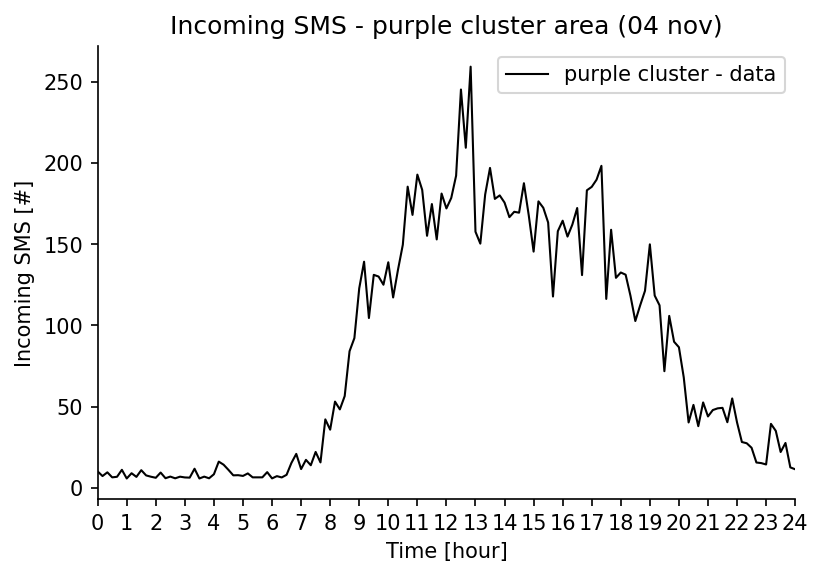

In [26]:

ydatasi5 = dfgr[dfgr.cellid==5162]['smsin']
xdatasi5 = dfgr[dfgr.cellid==5162]['smsin'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatasi5, ydatasi5, color='black', linewidth=1, linestyle='-', label='purple cluster - data')
plt.title("Incoming SMS - purple cluster area (1-10 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming SMS [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
plt.savefig('./wday-time-clustering/smsin-purple-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatasi5, ydatasi5, color='black', linewidth=1, linestyle='-', label='purple cluster - data')
plt.title("Incoming SMS - purple cluster area (04 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming SMS [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.savefig('./wday-time-clustering/smsin-purple.png')
plt.show()

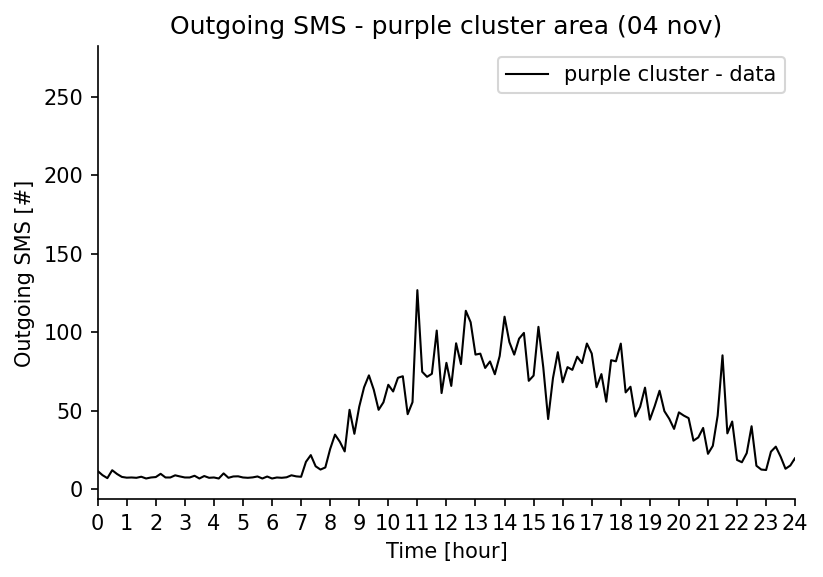

In [27]:

ydataso5 = dfgr[dfgr.cellid==5162]['smsout']
xdataso5 = dfgr[dfgr.cellid==5162]['smsout'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataso5, ydataso5, color='black', linewidth=1, linestyle='-', label='purple cluster - data')
plt.title("Outgoing SMS - purple cluster area (1-10 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing SMS [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
plt.savefig('./wday-time-clustering/smsout-purple-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataso5, ydataso5, color='black', linewidth=1, linestyle='-', label='purple cluster - data')
plt.title("Outgoing SMS - purple cluster area (04 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing SMS [#]")
plt.xlim([96,96+24])
#plt.ylim([0, 20])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.savefig('./wday-time-clustering/smsout-purple.png')
plt.show()

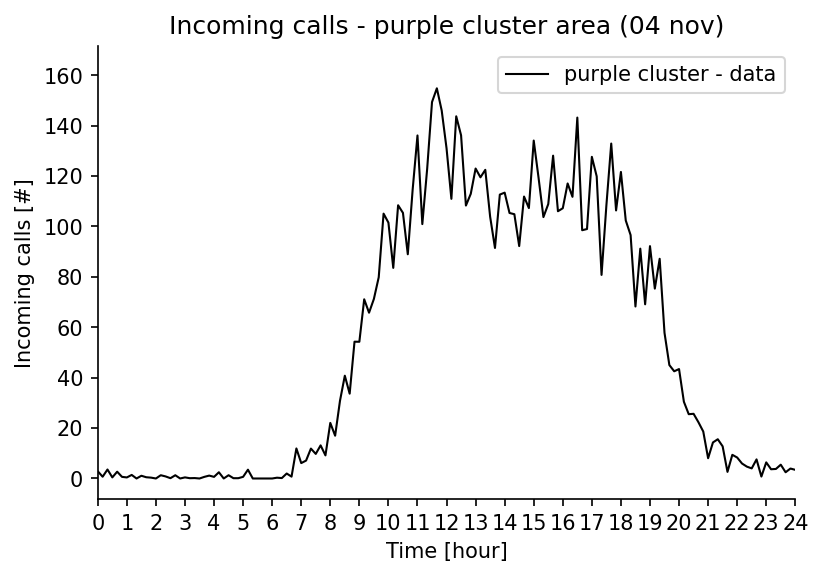

In [28]:

ydataci5 = dfgr[dfgr.cellid==5162]['callin']
xdataci5 = dfgr[dfgr.cellid==5162]['callin'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataci5, ydataci5, color='black', linewidth=1, linestyle='-', label='purple cluster - data')
plt.title("Incoming calls - purple cluster area (1-10 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming calls [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
plt.savefig('./wday-time-clustering/callin-purple-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataci5, ydataci5, color='black', linewidth=1, linestyle='-', label='purple cluster - data')
plt.title("Incoming calls - purple cluster area (04 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming calls [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.savefig('./wday-time-clustering/callin-purple.png')
plt.show()

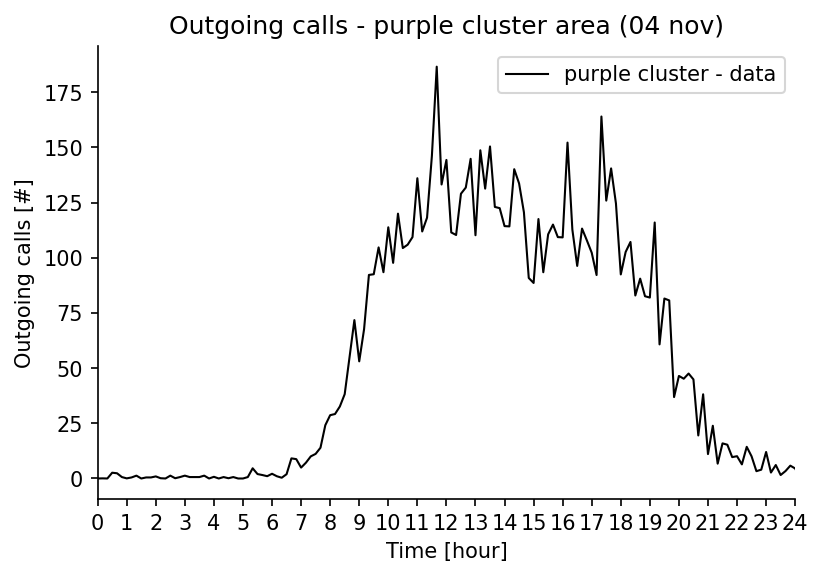

In [29]:

ydataco5 = dfgr[dfgr.cellid==5162]['callout']
xdataco5 = dfgr[dfgr.cellid==5162]['callout'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataco5, ydataco5, color='black', linewidth=1, linestyle='-', label='purple cluster - data')
plt.title("Outgoing calls - purple cluster area (1-10 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing calls [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
plt.savefig('./wday-time-clustering/callout-purple-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataco5, ydataco5, color='black', linewidth=1, linestyle='-', label='purple cluster - data')
plt.title("Outgoing calls - purple cluster area (04 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing calls [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.savefig('./wday-time-clustering/callout-purple.png')
plt.show()

In [30]:
print("CELL 4468 - green cluster")

CELL 4468 - green cluster


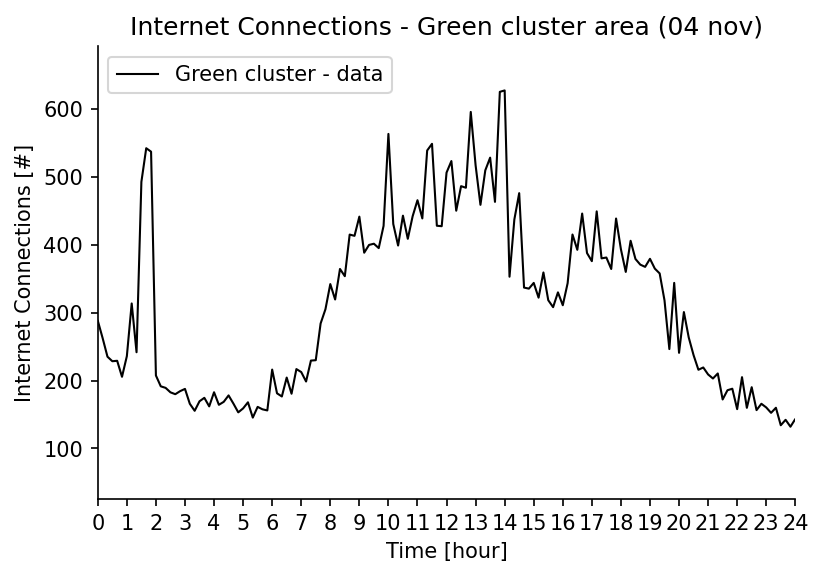

In [31]:
#Home area (near Via Luzzati) data
ydatai3 = dfgr[dfgr.cellid==4468]['internet']
xdatai3 = dfgr[dfgr.cellid==4468]['internet'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatai3, ydatai3, color='black', linewidth=1, linestyle='-', label='Green cluster - data')
plt.title("Internet Connections - Green cluster area (1-10 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Internet Connections [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
plt.savefig('./wday-time-clustering/int-green-full.png')
plt.close('all')
##########################################################
f = plt.figure(dpi=150)
plt.plot(xdatai3, ydatai3, color='black', linewidth=1, linestyle='-', label='Green cluster - data')
plt.title("Internet Connections - Green cluster area (04 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Internet Connections [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.savefig('./wday-time-clustering/int-green.png')
plt.show()

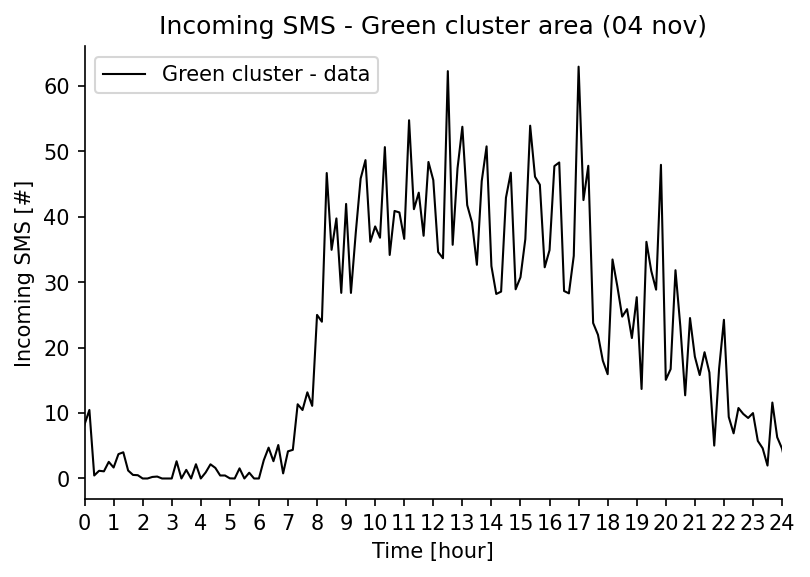

In [32]:

ydatasi3 = dfgr[dfgr.cellid==4468]['smsin']
xdatasi3 = dfgr[dfgr.cellid==4468]['smsin'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatasi3, ydatasi3, color='black', linewidth=1, linestyle='-', label='Green cluster - data')
plt.title("Incoming SMS - Green cluster area (1-10 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming SMS [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
plt.savefig('./wday-time-clustering/smsin-green-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatasi3, ydatasi3, color='black', linewidth=1, linestyle='-', label='Green cluster - data')
plt.title("Incoming SMS - Green cluster area (04 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming SMS [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.savefig('./wday-time-clustering/smsin-green.png')
plt.show()

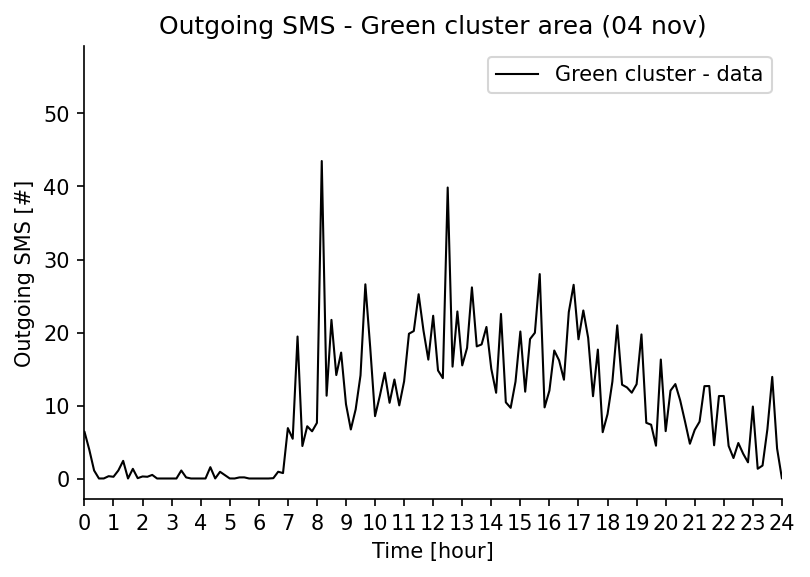

In [33]:

ydataso3 = dfgr[dfgr.cellid==4468]['smsout']
xdataso3 = dfgr[dfgr.cellid==4468]['smsout'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataso3, ydataso3, color='black', linewidth=1, linestyle='-', label='Green cluster - data')
plt.title("Outgoing SMS - Green cluster area (1-10 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing SMS [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
plt.savefig('./wday-time-clustering/smsout-green-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataso3, ydataso3, color='black', linewidth=1, linestyle='-', label='Green cluster - data')
plt.title("Outgoing SMS - Green cluster area (04 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing SMS [#]")
plt.xlim([96,96+24])
#plt.ylim([0, 20])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.savefig('./wday-time-clustering/smsout-green.png')
plt.show()

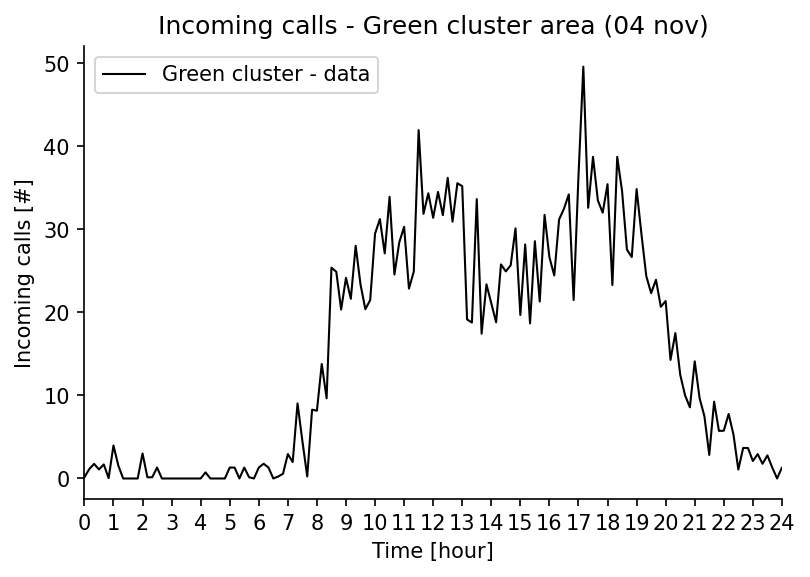

In [34]:

ydataci3 = dfgr[dfgr.cellid==4468]['callin']
xdataci3 = dfgr[dfgr.cellid==4468]['callin'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataci3, ydataci3, color='black', linewidth=1, linestyle='-', label='Green cluster - data')
plt.title("Incoming calls - Green cluster area (1-10 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming calls [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
plt.savefig('./wday-time-clustering/callin-green-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataci3, ydataci3, color='black', linewidth=1, linestyle='-', label='Green cluster - data')
plt.title("Incoming calls - Green cluster area (04 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming calls [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.savefig('./wday-time-clustering/callin-green.png')
plt.show()

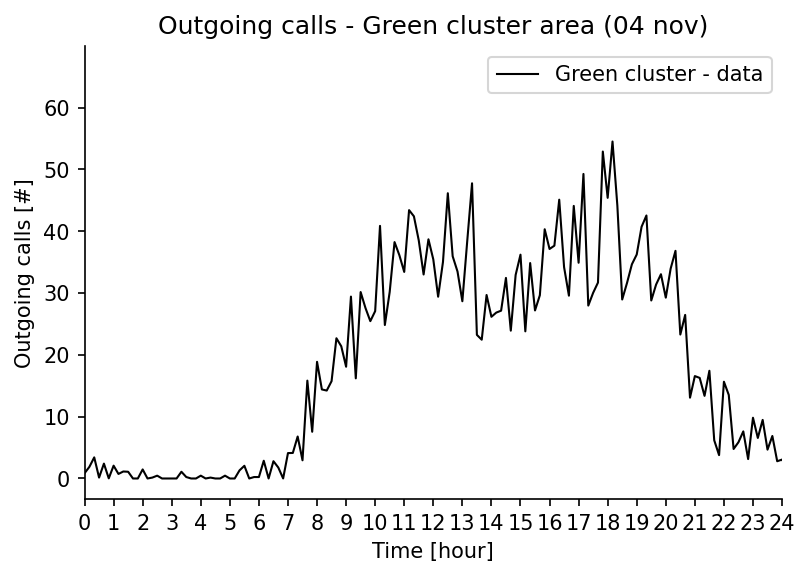

In [35]:

ydataco3 = dfgr[dfgr.cellid==4468]['callout']
xdataco3 = dfgr[dfgr.cellid==4468]['callout'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataco3, ydataco3, color='black', linewidth=1, linestyle='-', label='Green cluster - data')
plt.title("Outgoing calls - Green cluster area (1-10 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing calls [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
plt.savefig('./wday-time-clustering/callout-green-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataco3, ydataco3, color='black', linewidth=1, linestyle='-', label='Green cluster - data')
plt.title("Outgoing calls - Green cluster area (04 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing calls [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.savefig('./wday-time-clustering/callout-green.png')
plt.show()

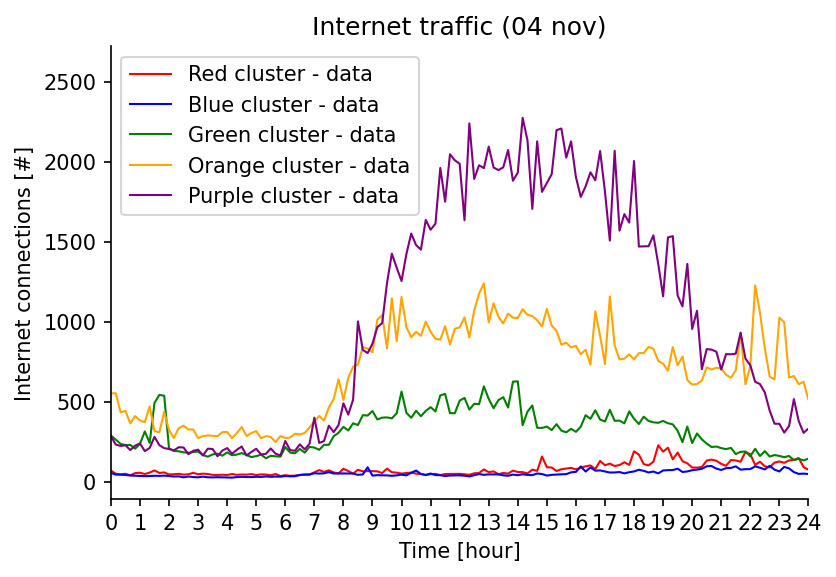

In [36]:
f = plt.figure(dpi=150)
plt.plot(xdatai1, ydatai1, color='red', linewidth=1, linestyle='-', label='Red cluster - data')
plt.plot(xdatai2, ydatai2, color='blue', linewidth=1, linestyle='-', label='Blue cluster - data')
plt.plot(xdatai3, ydatai3, color='green', linewidth=1, linestyle='-', label='Green cluster - data')
plt.plot(xdatai4, ydatai4, color='orange', linewidth=1, linestyle='-', label='Orange cluster - data')
plt.plot(xdatai5, ydatai5, color='purple', linewidth=1, linestyle='-', label='Purple cluster - data')

plt.title("Internet traffic (04 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Internet connections [#]")
plt.xlim([96,96+24])
#plt.ylim([0,200])
plt.xticks(hours_of_interest, normalized)
plt.legend()
sns.despine()
plt.savefig('./wday-time-clustering/internet-comparative.png')
plt.show()

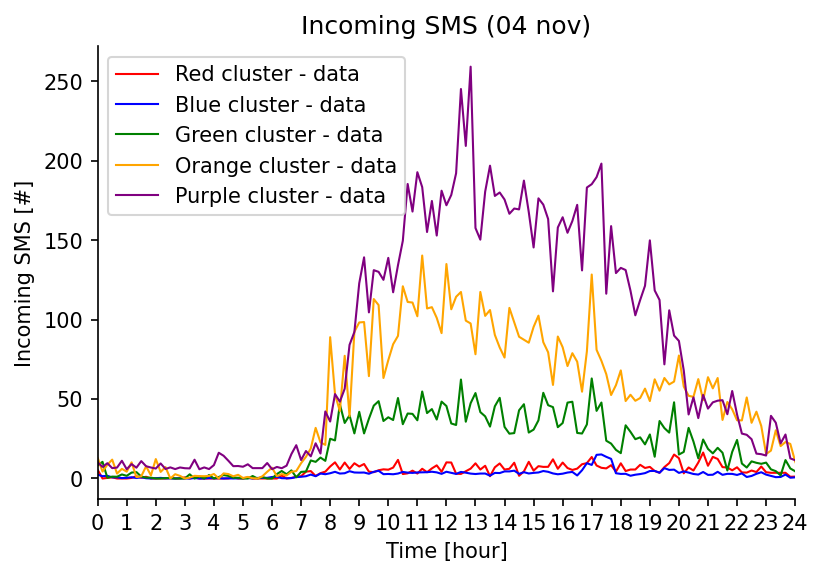

In [37]:
f = plt.figure(dpi=150)
plt.plot(xdatasi1, ydatasi1, color='red', linewidth=1, linestyle='-', label='Red cluster - data')
plt.plot(xdatasi2, ydatasi2, color='blue', linewidth=1, linestyle='-', label='Blue cluster - data')
plt.plot(xdatasi3, ydatasi3, color='green', linewidth=1, linestyle='-', label='Green cluster - data')
plt.plot(xdatasi4, ydatasi4, color='orange', linewidth=1, linestyle='-', label='Orange cluster - data')
plt.plot(xdatasi5, ydatasi5, color='purple', linewidth=1, linestyle='-', label='Purple cluster - data')
plt.title("Incoming SMS (04 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming SMS [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
plt.legend()
sns.despine()
plt.savefig('./wday-time-clustering/smsin-comparative.png')
plt.show()

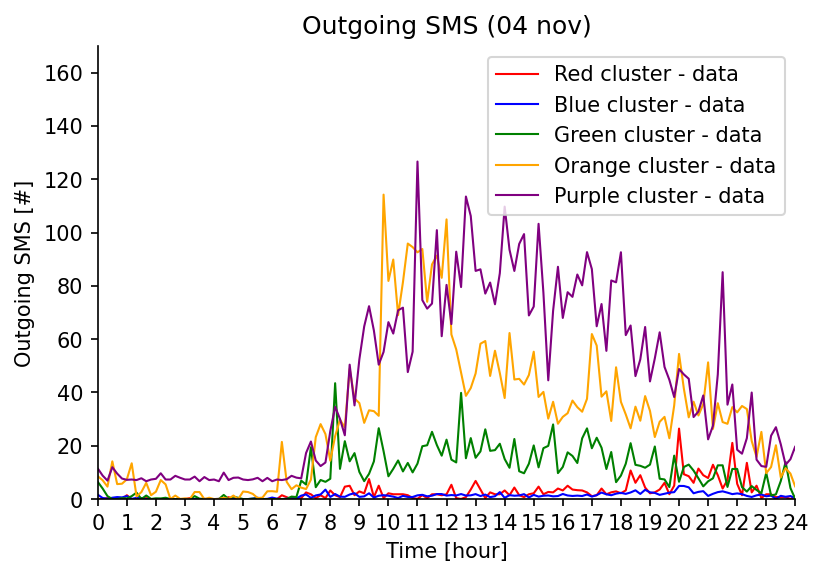

In [38]:
f = plt.figure(dpi=150)
plt.plot(xdataso1, ydataso1, color='red', linewidth=1, linestyle='-', label='Red cluster - data')
plt.plot(xdataso2, ydataso2, color='blue', linewidth=1, linestyle='-', label='Blue cluster - data')
plt.plot(xdataso3, ydataso3, color='green', linewidth=1, linestyle='-', label='Green cluster - data')
plt.plot(xdataso4, ydataso4, color='orange', linewidth=1, linestyle='-', label='Orange cluster - data')
plt.plot(xdataso5, ydataso5, color='purple', linewidth=1, linestyle='-', label='Purple cluster - data')

plt.title("Outgoing SMS (04 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing SMS [#]")
plt.xlim([96,96+24])
plt.ylim([0,170])
plt.xticks(hours_of_interest, normalized)
plt.legend()
sns.despine()
plt.savefig('./wday-time-clustering/smsout-comparative.png')
plt.show()

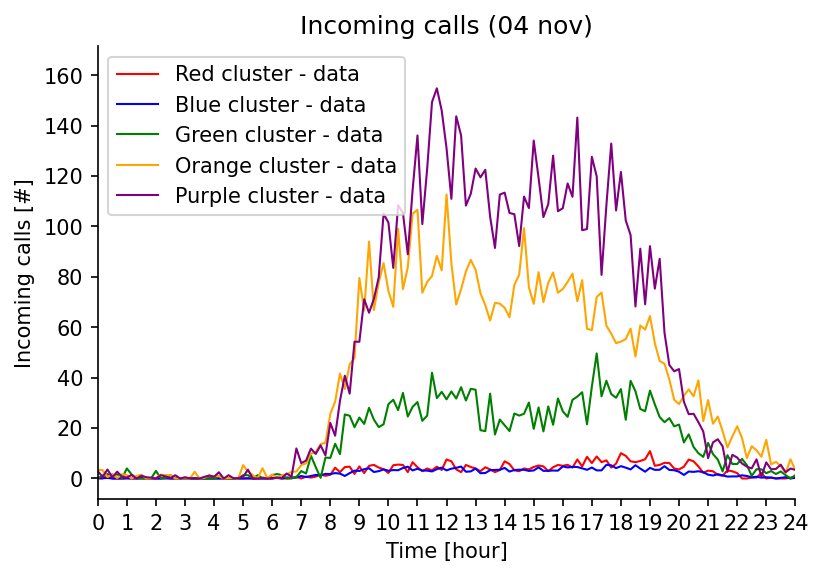

In [39]:
f = plt.figure(dpi=150)
plt.plot(xdataci1, ydataci1, color='red', linewidth=1, linestyle='-', label='Red cluster - data')
plt.plot(xdataci2, ydataci2, color='blue', linewidth=1, linestyle='-', label='Blue cluster - data')
plt.plot(xdataci3, ydataci3, color='green', linewidth=1, linestyle='-', label='Green cluster - data')
plt.plot(xdataci4, ydataci4, color='orange', linewidth=1, linestyle='-', label='Orange cluster - data')
plt.plot(xdataci5, ydataci5, color='purple', linewidth=1, linestyle='-', label='Purple cluster - data')

plt.title("Incoming calls (04 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming calls [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
plt.legend()
sns.despine()
plt.savefig('./wday-time-clustering/callin-comparative.png')
plt.show()

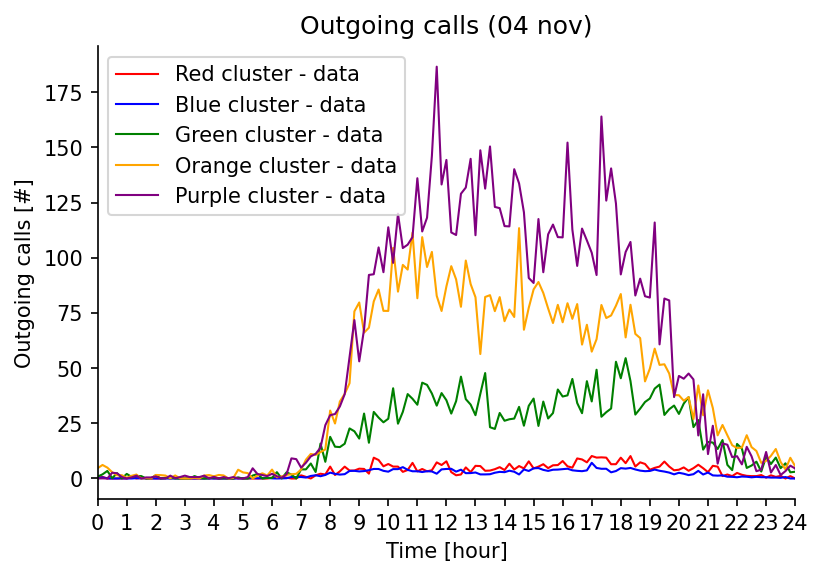

In [40]:
f = plt.figure(dpi=150)
plt.plot(xdataco1, ydataco1, color='red', linewidth=1, linestyle='-', label='Red cluster - data')
plt.plot(xdataco2, ydataco2, color='blue', linewidth=1, linestyle='-', label='Blue cluster - data')
plt.plot(xdataco3, ydataco3, color='green', linewidth=1, linestyle='-', label='Green cluster - data')
plt.plot(xdataco4, ydataco4, color='orange', linewidth=1, linestyle='-', label='Orange cluster - data')
plt.plot(xdataco5, ydataco5, color='purple', linewidth=1, linestyle='-', label='Purple cluster - data')

plt.title("Outgoing calls (04 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing calls [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
plt.legend()
sns.despine()
plt.savefig('./wday-time-clustering/callout-comparative.png')
plt.show()